In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
train_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\crop_dataset\crop_dataset"
test_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_data\test_data"

train_class_folders = os.listdir(train_folder)

# Dictionary for naming the class types

classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

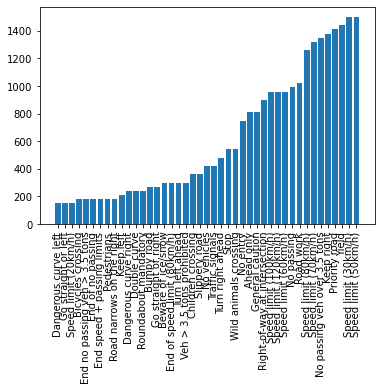

In [3]:
# Get number of instances per class and visualize the data

train_numberOfInstancesPerClass = []
class_names = []

for folder in train_class_folders:
    train_files = os.listdir(train_folder + '/' + folder)
    train_numberOfInstancesPerClass.append(len(train_files))
    class_names.append(classes[int(folder)])

pairs = zip(train_numberOfInstancesPerClass, class_names)
pairs = sorted(pairs)
tuples = zip(*pairs)
train_numberOfInstancesPerClass, class_names = [
    list(tuple) for tuple in tuples]

plt.bar(class_names, train_numberOfInstancesPerClass)
plt.xticks(class_names, rotation='vertical')
plt.show()

In [4]:
# Creating image data and label arrs for training/validation sets

images = []
labels = []

for imgClass in range(len(classes)):
    imgFolder_path = train_folder + "\\" + str(imgClass).zfill(5)
    #print(imgFolder_path)
    imgFolder = os.listdir(imgFolder_path)

    for img in imgFolder:
        image = plt.imread(imgFolder_path + "\\" + img)  # get an image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((32, 32))  # resize all images to same size
        images.append(np.array(image))
        labels.append(imgClass)

images = np.array(images)
labels = np.array(labels)

In [5]:
import cv2
from matplotlib import pyplot as plt

# Görüntüyü oku
image = cv2.imread(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\crop_dataset\crop_dataset\00000\00000_00000.jpg")
# Görüntüyü RGB formatına dönüştür (OpenCV BGR formatında okur)
print(image)
image = plt.imread(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\crop_dataset\crop_dataset\00000\00000_00000.jpg")
print(image)

None
[[[175  54  73]
  [191  75  94]
  [170  61  82]
  ...
  [140 116 106]
  [142 120 109]
  [140 122 110]]

 [[191 117 134]
  [192 121 137]
  [184 116 131]
  ...
  [100  77  69]
  [ 95  77  67]
  [ 94  77  69]]

 [[129 120 139]
  [108  95 112]
  [117 100 110]
  ...
  [103  85  81]
  [ 93  78  73]
  [ 86  75  69]]

 ...

 [[124 123 118]
  [ 93  99  89]
  [ 74  88  73]
  ...
  [ 93  93  95]
  [ 79  79  81]
  [ 79  79  81]]

 [[127 130 123]
  [ 97 107  96]
  [ 77  95  79]
  ...
  [ 92  92  94]
  [ 79  79  81]
  [ 78  78  80]]

 [[123 135 125]
  [ 97 115 101]
  [ 76 103  84]
  ...
  [ 90  90  92]
  [ 77  77  79]
  [ 77  77  79]]]


In [6]:
# Shuffle the dataset

shuffle_indexes = np.arange(images.shape[0])
np.random.shuffle(shuffle_indexes)
images = images[shuffle_indexes]
labels = labels[shuffle_indexes]

In [7]:
# Create the training and validation sets 

x_train, x_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.3, shuffle=True)

x_train = x_train/255
x_val = x_val/255  # !!!! WHY?

# Convert classes to one-hot vectors
y_train = keras.utils.to_categorical(y_train, len(classes))
y_val = keras.utils.to_categorical(y_val, len(classes))

In [8]:
# Load the test data and create the test sets

test_csv = pd.read_csv(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_labels.csv")
labels = test_csv['label'].values  # y_test
images = test_csv['image'].values
x_test = []

for imagePath in images:
    image = plt.imread(test_folder+ "\\" + imagePath)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((32, 32))
    x_test.append(np.array(image))

x_test = np.array(x_test)
x_test = x_test/255

In [9]:
lenet5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh',
                        input_shape=x_train[0].shape, padding='same'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    keras.layers.Conv2D(16, kernel_size=5, strides=1,
                        activation='tanh', padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(120, kernel_size=5, strides=1,
                        activation='tanh', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(43, activation='softmax')  # Output layer. 43 since since there are 43 possible classes.
])


C:\Users\ŞeymaÇakmak\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,051 (371.29 KB)

 Trainable params: 95,051 (371.29 KB)

 Non-trainable params: 0 (0.00 B)

x tr: (18648, 32, 32, 3)
y tr: (18648, 43)
x val: (7992, 32, 32, 3)
y val: (7992, 43)
Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5976 - loss: 1.6427 - val_accuracy: 0.9540 - val_loss: 0.2068
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9671 - loss: 0.1718 - val_accuracy: 0.9802 - val_loss: 0.0920
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0711 - val_accuracy: 0.9836 - val_loss: 0.0647
Epoch 4/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0461 - val_accuracy: 0.9875 - val_loss: 0.0545
Epoch 5/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9965 - loss: 0.0273 - val_accuracy: 0.9839 - val_loss: 0.0588
Epoch 6/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9977 - loss: 0.0189 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 7/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9989 - loss: 0.0109 - val_accuracy: 0.9916 - val_loss: 0.0306
Epoch 8/10
583/583

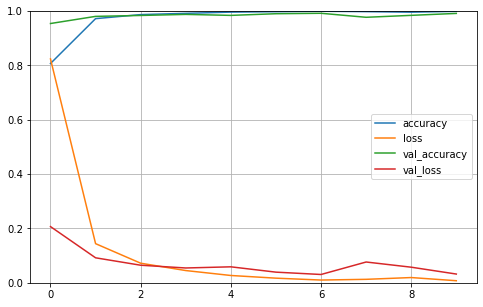

In [10]:
lenet5_model.compile(
    optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

lenet5_model.summary()

print("x tr: " + str(x_train.shape))
print("y tr: " + str(y_train.shape))
print("x val: "+str(x_val.shape))
print("y val: "+str(y_val.shape))

history = lenet5_model.fit(x_train, y_train, epochs=10,
                           validation_data=(x_val, y_val))

# Show the graph for training and validation.

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
# Make the prediction with test data

pred = lenet5_model.predict(x_test)
pred = np.argmax(pred, axis=1)

# Measure the accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Data accuracy:  94.15676959619952


In [70]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Macro-Ortalama Kesinlik: 0.9223316265108586
Macro-Ortalama Duyarlılık: 0.9161861971212323
Macro-Ortalama F1 Skoru: 0.9158077357511976

Mikro-Ortalama Kesinlik: 0.9415676959619953
Mikro-Ortalama Duyarlılık: 0.9415676959619953
Mikro-Ortalama F1 Skoru: 0.9415676959619953


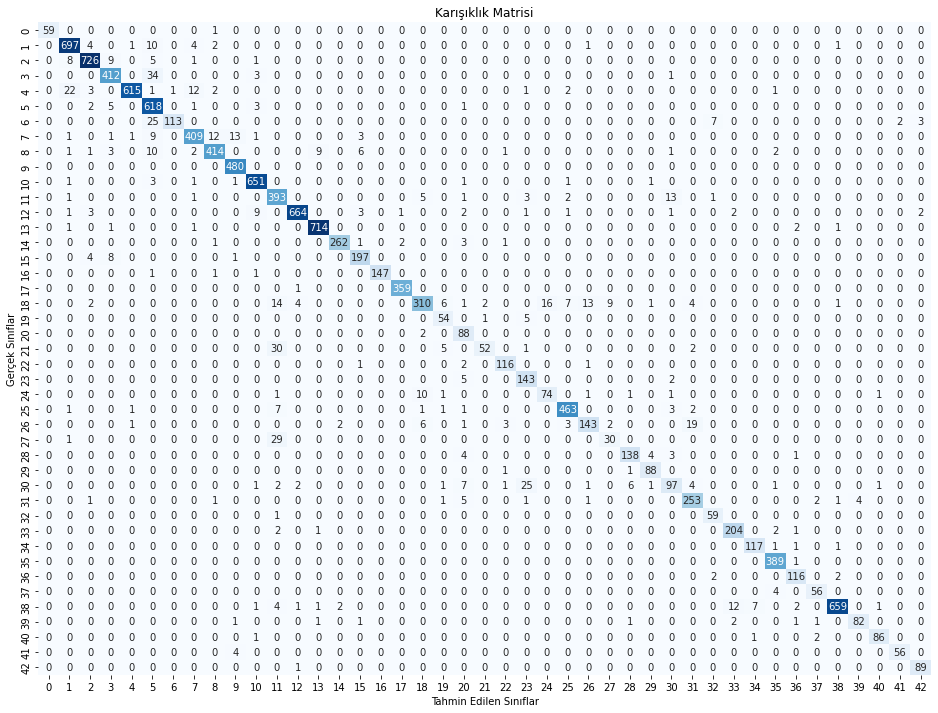

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()


In [44]:
def sliding_window(image, step, window_size, model, classes, threshold=0.5):
    # Resmin boyutlarını alın
    (h, w) = image.shape[:2]
    
    # Kaydırma penceresi boyutları
    (window_width, window_height) = window_size
    
    # Modelin beklediği giriş boyutları
    (input_width, input_height) = model.input_shape[1:3]
    
    # Tüm pencere tahminlerini saklamak için boş bir liste oluşturun
    all_predictions = []
    
    # Resim üzerinde gezinme döngüsü
    for y in range(0, h - window_height + 1, step):
        for x in range(0, w - window_width + 1, step):
            # Kaydırma penceresini alın
            window = image[y:y + window_height, x:x + window_width]
            
            # Kaydırma penceresini yeniden boyutlandırın
            window_resized = cv2.resize(window, (input_width, input_height))
            
            # Kaydırma penceresini modelinize besleyin ve sonucu alın
            result = model.predict(np.expand_dims(window_resized, axis=0))
            
            # Pencere tahminlerini listeye ekleyin
            all_predictions.append(result)
    
    # Tüm pencere tahminlerini birleştirerek toplu bir tahmin yapın
    all_predictions = np.array(all_predictions)
    all_predictions = np.mean(all_predictions, axis=0)
    
    # Tahminlerin sınıfını belirleyin
    predicted_class = get_predicted_class(all_predictions, classes, threshold)
    
    # Toplu tahmin sonucunu ve tahmin edilen sınıfı yazdırın
    print("Aggregated Prediction:", all_predictions)
    print("Predicted Class for the Whole Image:", predicted_class)

def get_predicted_class(predictions, classes, threshold):
    # Eşik değeri üzerindeki tahminlerin sayısını sayın
    count_over_threshold = np.sum(predictions > threshold)
    
    # Eğer eşik değeri üzerindeki tahminlerin sayısı yeterli ise,
    # en sık tahmin edilen sınıfı döndürün, aksi takdirde "Unknown" sınıfını döndürün
    if count_over_threshold > 0:
        most_common_class_index = np.argmax(predictions)
        predicted_class = classes[most_common_class_index]
    else:
        predicted_class = "Unknown"
    
    return predicted_class


# Test resmini yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Pencere boyutu ve kaydırma adımını belirleyin
window_size = (16, 16)
step = 32

# Eşik değerini belirleyin
threshold = 0.2

# Kaydırma penceresini uygulayın
sliding_window(image, step, window_size, lenet5_model, classes, threshold)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [25]:
# Görüntünün boyutlarını alın
height, width, channels = image.shape

print("Height:", height)
print("Width:", width)
print("Channels:", channels)

Height: 800
Width: 1360
Channels: 3


In [40]:
import cv2
import numpy as np

def sliding_window(image, step, window_sizes, model, threshold):
    (h, w) = image.shape[:2]
    (input_width, input_height) = model.input_shape[1:3]

    max_confidence = -1
    max_confidence_class = "Unknown"
    best_window_size = None

    for window_size in window_sizes:
        (window_width, window_height) = window_size
        for y in range(0, h - window_height + 1, step):
            for x in range(0, w - window_width + 1, step):
                window = image[y:y + window_height, x:x + window_width]
                window_resized = cv2.resize(window, (input_width, input_height))
                result = model.predict(np.expand_dims(window_resized, axis=0))
                confidence = np.max(result)

                if confidence > max_confidence:
                    max_confidence = confidence
                    max_confidence_class = "Class_" + str(np.argmax(result))
                    best_window_size = window_size

                if max_confidence >= threshold:
                    return max_confidence_class, best_window_size

    return max_confidence_class, best_window_size if max_confidence >= threshold else ("Unknown", None)

# Örnek bir görüntü yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Kaydırma adımını belirleyin
step = 32
threshold = 0.95  # Eşik değeri

# Denenecek pencere boyutları aralığını belirtin
min_window_size = (8, 8)
max_window_size = (64, 64)
window_sizes = [(w, h) for w in range(min_window_size[0], max_window_size[0] + 1, 32) for h in range(min_window_size[1], max_window_size[1] + 1, 32)]

# Sonuç için modeli belirtin
model = lenet5_model

# Kaydırma penceresini uygulayın ve sonucu alın
predicted_class, best_window_size = sliding_window(image, step, window_sizes, model, threshold)

print("Predicted Class for the Whole Image:", predicted_class)
print("Best Window Size:", best_window_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class for the Whole Image: Class_18
Best Window Size: (8, 8)


In [59]:
import cv2
import numpy as np

def sliding_window(image, step, window_size):
    # Resmin boyutlarını alın
    (h, w) = image.shape[:2]
    
    # Kaydırma penceresi boyutları
    (window_width, window_height) = window_size
    
    # Resim üzerinde gezinme döngüsü
    for y in range(0, h - window_height + 1, step):
        for x in range(0, w - window_width + 1, step):
            # Kaydırma penceresini alın
            window = image[y:y + window_height, x:x + window_width]
            
            # Pencerede belirli bir şeklin olup olmadığını kontrol edin
            if detect_shape(window):
                print("Window at ({}, {}) contains the shape.".format(x, y))
                # Eğer bir şekil varsa, burada istediğiniz işlemi yapabilirsiniz.

def detect_shape(window):
    # Gri tonlamalı hale getirin
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Kenarları tespit etmek için Canny kenar tespiti uygulayın
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Contourları bulun
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Tüm konturları döngüye alın
    for contour in contours:
        # Konturun uzunluğunu hesaplayın
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
        
        # Eğer kontur 3 kenarlı ise (üçgen), True döndürün
        if len(approx) == 3:
            return True
        # Eğer kontur 4 kenarlı ise (kare), True döndürün
        elif len(approx) == 4:
            return True
        # Eğer kontur yuvarlaksa (daire), True döndürün
        elif len(approx) > 8:
            return True
    
    # Eğer yukarıdaki koşullar sağlanmıyorsa, False döndürün
    return False

# Test resmini yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Pencere boyutu ve kaydırma adımını belirleyin
window_size = (64, 64)
step = 32

# Kaydırma penceresini uygulayın
sliding_window(image, step, window_size)


Window at (0, 0) contains the shape.
Window at (896, 192) contains the shape.
Window at (928, 192) contains the shape.
Window at (960, 192) contains the shape.
Window at (992, 192) contains the shape.
Window at (1024, 192) contains the shape.
Window at (1056, 192) contains the shape.
Window at (1088, 192) contains the shape.
Window at (1280, 192) contains the shape.
Window at (96, 224) contains the shape.
Window at (128, 224) contains the shape.
Window at (864, 224) contains the shape.
Window at (896, 224) contains the shape.
Window at (928, 224) contains the shape.
Window at (960, 224) contains the shape.
Window at (992, 224) contains the shape.
Window at (1024, 224) contains the shape.
Window at (1056, 224) contains the shape.
Window at (1088, 224) contains the shape.
Window at (1120, 224) contains the shape.
Window at (1152, 224) contains the shape.
Window at (1248, 224) contains the shape.
Window at (1280, 224) contains the shape.
Window at (96, 256) contains the shape.
Window at (

Window at (1088, 480) contains the shape.
Window at (1120, 480) contains the shape.
Window at (0, 512) contains the shape.
Window at (32, 512) contains the shape.
Window at (64, 512) contains the shape.
Window at (96, 512) contains the shape.
Window at (128, 512) contains the shape.
Window at (160, 512) contains the shape.
Window at (192, 512) contains the shape.
Window at (224, 512) contains the shape.
Window at (256, 512) contains the shape.
Window at (288, 512) contains the shape.
Window at (320, 512) contains the shape.
Window at (352, 512) contains the shape.
Window at (384, 512) contains the shape.
Window at (416, 512) contains the shape.
Window at (448, 512) contains the shape.
Window at (480, 512) contains the shape.
Window at (512, 512) contains the shape.
Window at (544, 512) contains the shape.
Window at (576, 512) contains the shape.
Window at (608, 512) contains the shape.
Window at (640, 512) contains the shape.
Window at (832, 512) contains the shape.
Window at (864, 512

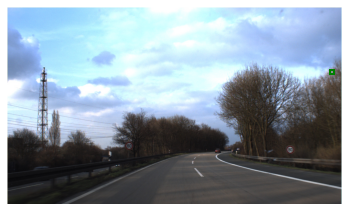

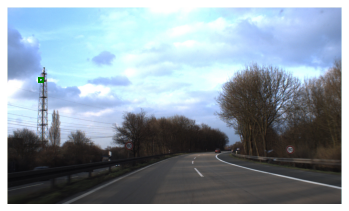

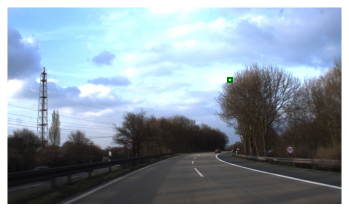

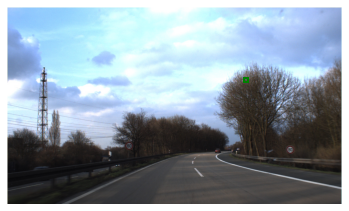

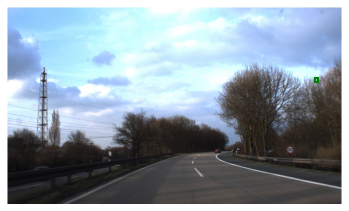

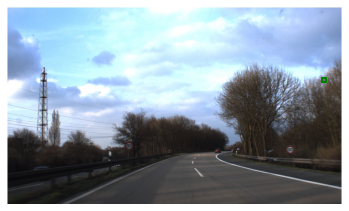

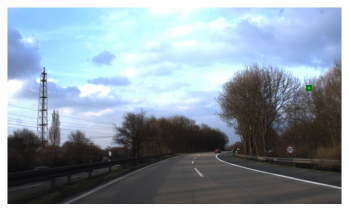

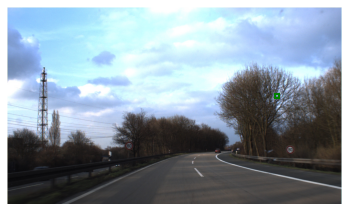

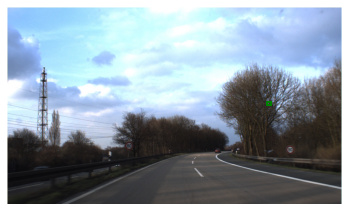

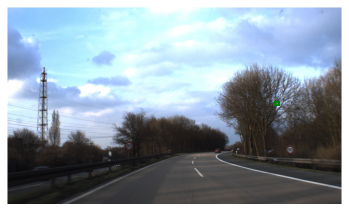

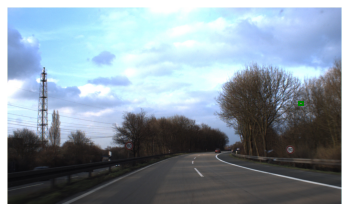

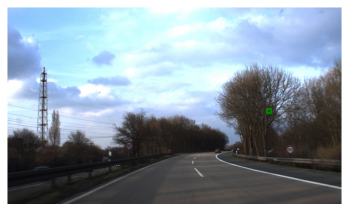

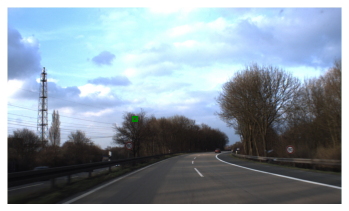

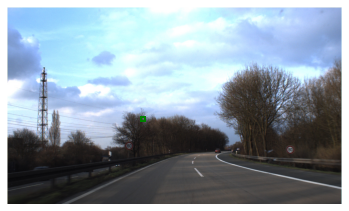

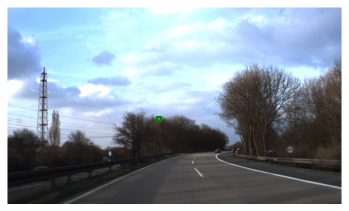

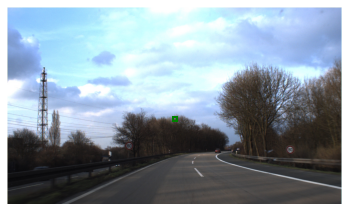

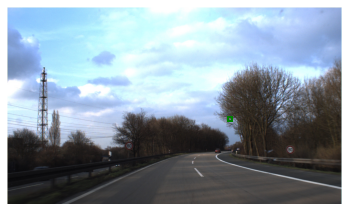

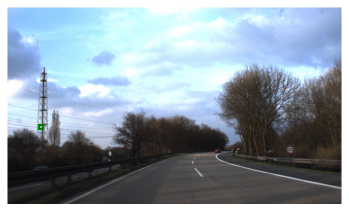

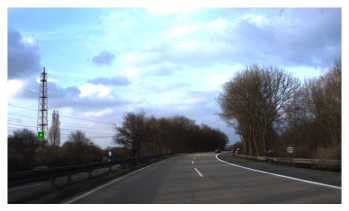

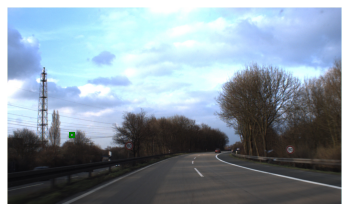

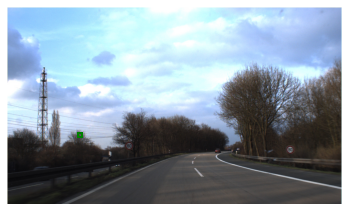

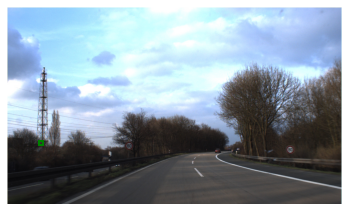

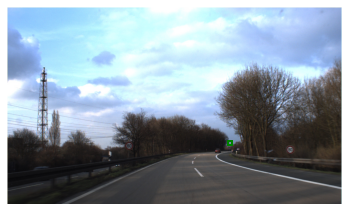

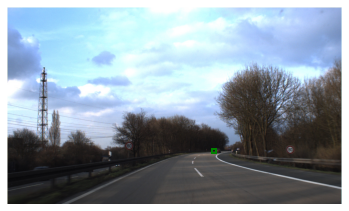

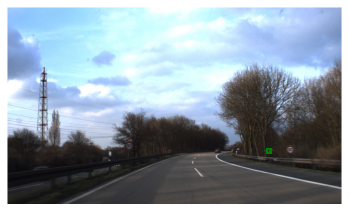

In [50]:
import cv2

def draw_window(image, x, y, width, height):
    # Pencereyi çizmek için yeni bir figure oluşturun
    plt.figure()
    
    # Resmi gösterin
    plt.imshow(image)
    
    # Pencereyi çizin
    rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
    plt.gca().add_patch(rect)
    
    # Eksenleri kapatın
    plt.axis('off')
    
    # Pencereyi gösterin
    plt.show()

    
window_x = 128
window_y = 512
window_width = 16
window_height = 16
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)
# Belirtilen pencereyi çizdirin
windows = [
    (1312, 256), (128, 288), (896, 288), (960, 288), (1248, 288), 
    (1280, 288), (1216, 320), (1088, 352), (1056, 384), (1088, 384), 
    (1184, 384), (1056, 416), (512, 448), (544, 448), (608, 448), 
    (672, 448), (896, 448), (128, 480), (128, 512), (256, 512), 
    (288, 512), (128, 544), (896, 544), (832, 576), (1056, 576)
]

for window in windows:
    window_x, window_y = window
    window_width, window_height = 32, 32
    draw_window(image, window_x, window_y, window_width, window_height)